In [1]:
import os
import pandas as pd

# Veri setinin bulunduğu klasörleri temsil eden isimler
dataset_path = "ImageData"  # Eğer tüm veri seti buradaysa, değiştirilebilir

# Klasörlerin adlarını belirliyoruz (bunlar veri setinin sınıfları)
class_folders = ["lung_aca", "lung_n", "lung_scc"]

# Her sınıftan kaç görüntü olduğunu sayalım
data_info = []

for class_name in class_folders:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):  # Klasör var mı kontrol edelim
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        data_info.append([class_name, num_images])
    else:
        data_info.append([class_name, 0])  # Eğer klasör bulunmazsa 0 olarak ekleyelim

# Sonuçları bir tablo olarak gösterelim
df_data_info = pd.DataFrame(data_info, columns=["Class", "Number of Images"])
df_data_info

,Class,Number of Images
0,lung_aca,5000
1,lung_n,5000
2,lung_scc,5000


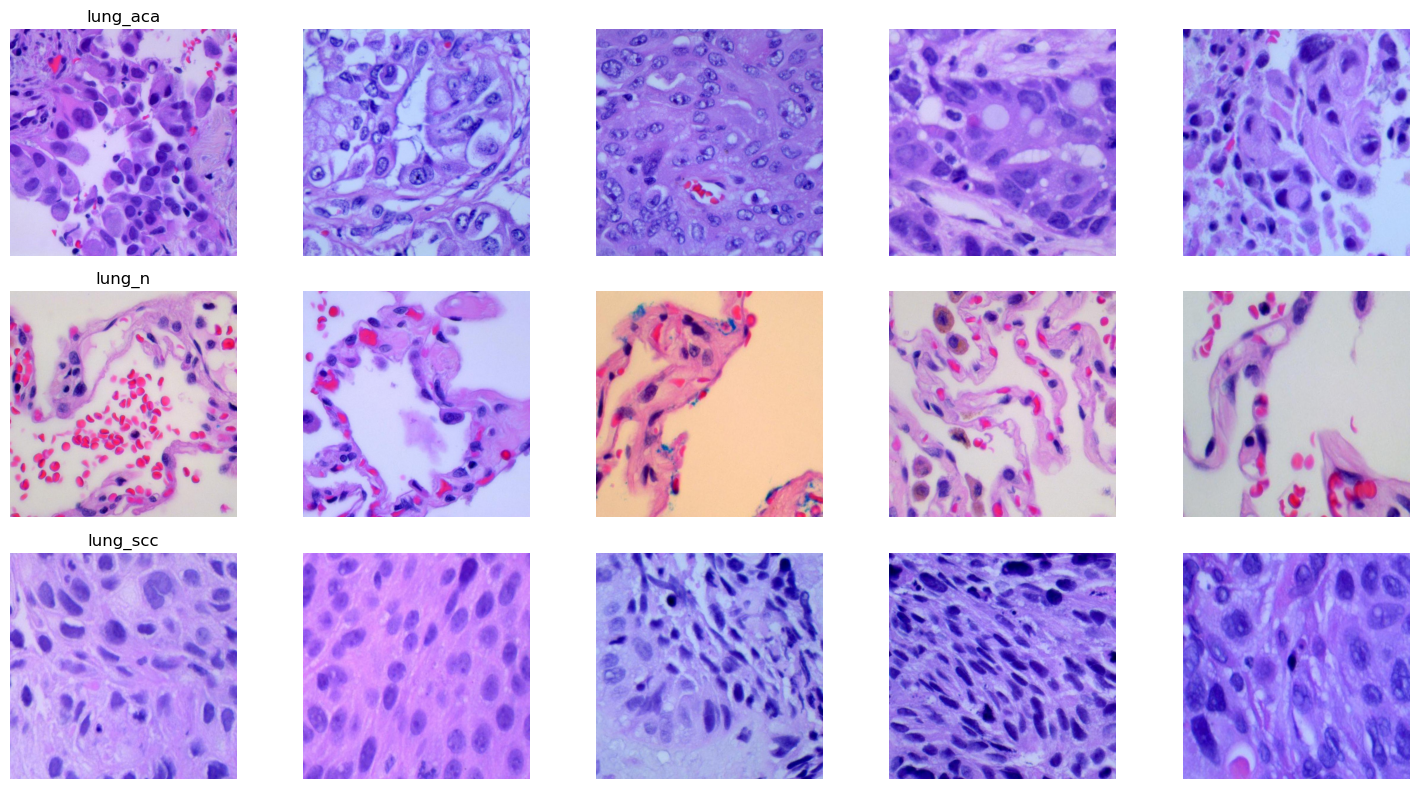

In [2]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Veri seti klasör yolu (kullanıcının sağladığı yapıya göre ayarlanmalı)
data_dir = "ImageData"
class_names = ["lung_aca", "lung_n", "lung_scc"]

# Her sınıftan rastgele bir kaç görüntü seçme
num_samples = 5
image_samples = {}

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.exists(class_path):
        images = os.listdir(class_path)
        selected_images = random.sample(images, min(num_samples, len(images)))
        image_samples[class_name] = [os.path.join(class_path, img) for img in selected_images]

# Örnek görüntüleri gösterme
fig, axes = plt.subplots(len(class_names), num_samples, figsize=(15, 8))
for i, class_name in enumerate(class_names):
    for j, img_path in enumerate(image_samples.get(class_name, [])):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV BGR formatını RGB'ye çevir
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(class_name, fontsize=12)

plt.tight_layout()
plt.show()

## Otsu's Thresholding Yöntemi

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Görüntülerin bulunduğu klasör
image_folder = "ImageData/lung_aca"  # Kendi klasörüne göre değiştir

# Maskeleri kaydetmek için klasör oluştur
output_mask_folder = "Mask/otsu_masks_aca"
os.makedirs(output_mask_folder, exist_ok=True)

# İşlenecek kaç görüntü var?
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Gri ölçekli oku

    # Otsu Thresholding uygula
    _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Maskeyi kaydet
    mask_path = os.path.join(output_mask_folder, img_file)
    cv2.imwrite(mask_path, mask)

print(f"✅ Otsu Thresholding ile {len(image_files)} maskeler oluşturuldu!")

✅ Otsu Thresholding ile 5000 maskeler oluşturuldu!


In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Görüntülerin bulunduğu klasör
image_folder = "ImageData/lung_n"  # Kendi klasörüne göre değiştir

# Maskeleri kaydetmek için klasör oluştur
output_mask_folder = "Mask/otsu_masks_n"
os.makedirs(output_mask_folder, exist_ok=True)

# İşlenecek kaç görüntü var?
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Gri ölçekli oku

    # Otsu Thresholding uygula
    _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Maskeyi kaydet
    mask_path = os.path.join(output_mask_folder, img_file)
    cv2.imwrite(mask_path, mask)

print(f"✅ Otsu Thresholding ile {len(image_files)} maskeler oluşturuldu!")

✅ Otsu Thresholding ile 5000 maskeler oluşturuldu!


In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Görüntülerin bulunduğu klasör
image_folder = "ImageData/lung_scc"  # Kendi klasörüne göre değiştir

# Maskeleri kaydetmek için klasör oluştur
output_mask_folder = "Mask/otsu_masks_scc"
os.makedirs(output_mask_folder, exist_ok=True)

# İşlenecek kaç görüntü var?
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Gri ölçekli oku

    # Otsu Thresholding uygula
    _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Maskeyi kaydet
    mask_path = os.path.join(output_mask_folder, img_file)
    cv2.imwrite(mask_path, mask)

print(f"✅ Otsu Thresholding ile {len(image_files)} maskeler oluşturuldu!")

✅ Otsu Thresholding ile 5000 maskeler oluşturuldu!


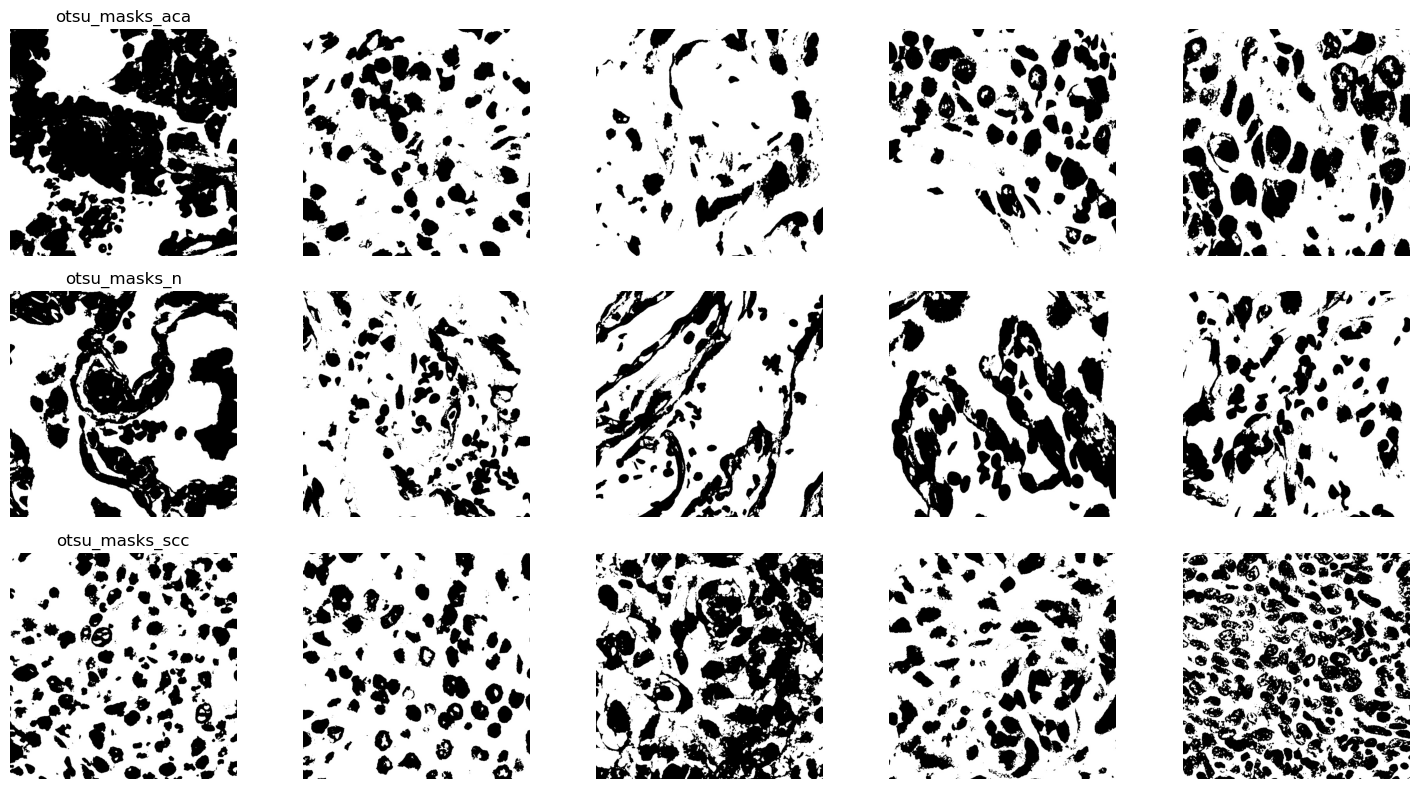

In [6]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Veri seti klasör yolu (kullanıcının sağladığı yapıya göre ayarlanmalı)
data_dir = "Mask"
class_names = ["otsu_masks_aca", "otsu_masks_n", "otsu_masks_scc"]

# Her sınıftan rastgele bir kaç görüntü seçme
num_samples = 5
image_samples = {}

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.exists(class_path):
        images = os.listdir(class_path)
        selected_images = random.sample(images, min(num_samples, len(images)))
        image_samples[class_name] = [os.path.join(class_path, img) for img in selected_images]

# Örnek görüntüleri gösterme
fig, axes = plt.subplots(len(class_names), num_samples, figsize=(15, 8))
for i, class_name in enumerate(class_names):
    for j, img_path in enumerate(image_samples.get(class_name, [])):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV BGR formatını RGB'ye çevir
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(class_name, fontsize=12)

plt.tight_layout()
plt.show()